In [1]:
# Trains - Example of integrating plots and training on jupyter notebook. 
# In this example, simple graphs are shown, then an MNIST classifier is trained using Keras.

from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Connecting TRAINS
from trains import Task
task = Task.init(project_name = 'examples', task_name = 'notebook example')


TRAINS Task: overwriting (reusing) task id=8d23de406d0a4159a496b64c7eba0e32
======> WARNING! UNCOMMITTED CHANGES IN REPOSITORY https://github.com/allegroai/trains.git <======
TRAINS results page: https://demoapp.trainsai.io/projects/087f765c846c4c76a7e9f3d035667d82/experiments/8d23de406d0a4159a496b64c7eba0e32/output/log


In [4]:
# Set script parameters
task_params = {'num_scatter_samples': 60, 'sin_max_value': 20, 'sin_steps': 30}
task_params = task.connect(task_params)


Simple plots. You can view the plots in experiments results page  

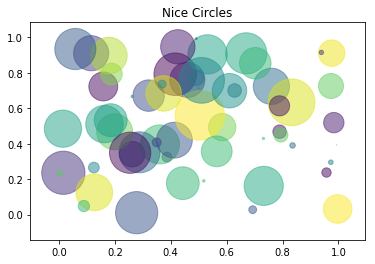

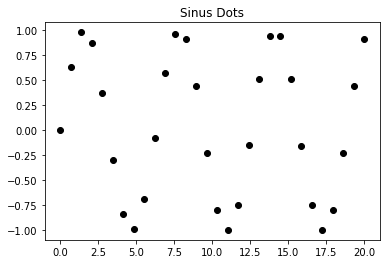

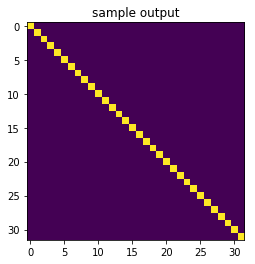

In [5]:
%matplotlib inline
N = task_params['num_scatter_samples']
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (50 * np.random.rand(N))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Nice Circles')
plt.show()

x = np.linspace(0, task_params['sin_max_value'], task_params['sin_steps'])
y = np.sin(x)
plt.plot(x, y, 'o', color='black')
plt.title('Sinus Dots')
plt.show()

m = np.eye(32, 32, dtype=np.uint8)
plt.imshow(m)
plt.title('sample output')
plt.show()

Keras training example


In [6]:
# Notice, Updating task_params is traced and updated in TRAINS
task_params['batch_size'] = 128
task_params['nb_classes'] = 10
task_params['nb_epoch'] = 6
task_params['hidden_dim'] = 512
batch_size = task_params['batch_size']
nb_classes = task_params['nb_classes']
nb_epoch = task_params['nb_epoch']


In [7]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

hidden_dim = task_params['hidden_dim']
model = Sequential()
model.add(Dense(hidden_dim, input_shape=(784,)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(hidden_dim))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

board = TensorBoard(histogram_freq=1, log_dir='/tmp/histogram_example')
model_store = ModelCheckpoint(filepath='/tmp/weight.{epoch}.hdf5')

model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    callbacks=[board, model_store],
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable